# Basic Python Indexing

In [1]:
# ! pip3 install scipy
# ! pip3 install seaborn
# ! pip3 install statsmodels

In [2]:
import numpy as np
import pandas as pd 
from string import ascii_lowercase
from scipy.stats import ttest_ind
import seaborn as sns 
import statsmodels.formula.api as smf

## Slicing 

For almost any of the data science work that we might want to do, we will want to store data objects in either `numpy` arrays and matrices, or `pandas` dataFrames. Why? Well, so that we can use them easily! 

To store data as a vector, we can use the numpy `array` object type using the following call`np.array`. 

Suppose a vector of the following form:

In [3]:
v = np.array([1,2,3,4,6])

In [4]:
v[-2]

4

If a vector is one-dimensional, then we can either:

- Reference a location in that vector:
  - `v[2]` Will print the value in the third position
  - `v[5]` Will print the value in the sixth position
  - `v[[2,5]]`  Will print the value in the third and sixth positions
  - `v[-1]`  Will print the first value, starting from the end of the vector. (Why does python choose in 0 index, but not keep this consistent when backward indexing? Who knows!) 
  - `v == 2` Tests for each value in that vector taking a particular tested, in this case, 2. 

And so, 

- `v[v == 2]` Will print only the values that meet the test.
- `v[v == 5]` Will not print anything (while `v[v == 6]` will return `6`).
- `v[(v>=1) & (v<=3)]` will find values within a range.

Pandas `dataFrames` are just collections of vectors.

If vectors are single dimensional objects that can be indexed, then a `dataFrame` is just a collection of vectors that can also be indexed. Importantly, once we have more than one vector collected, we've got more than a single dimension that we have to index. This is *ok*, because we can just index in both of these directions. 

Note as well that one of the features that we appreciate about these data.frames is that they can collect vectors that are of different types in a way that a matrix cannot. 

In [5]:
df = pd.DataFrame(data={
    'id'   : np.arange(0,20),
    'value': np.arange(0,20) ** 2,
    'type' : np.repeat(["A", "B", "C", "D", "E"], 4)}
)
df

,id,value,type
0,0,0,A
1,1,1,A
2,2,4,A
3,3,9,A
4,4,16,B
5,5,25,B
6,6,36,B
7,7,49,B
8,8,64,C
9,9,81,C


We can reference any of the vectors that are stored in the data frame by `stringing` into that object using the `.` operator and then naming the vector that we're interested in. Note that by calling the stored data.frame object we're scoping from the global namespace into the namespace for that object, and then calling for the named vector. We *could* also pull this based on location -- though this brings on considerable risk: If the data structure should change in the future, you'll pull from a position that might have different information than you think it does. 

In [6]:
type(df)
type(df.id)

pandas.core.series.Series

Because the vectors in this data.frame are all of the same length, we can pass logical tests to pull specific parts of the data, based on indexes of other data. 

Suppose that we wanted to pull all the type A objects: 

- Write the test that will return true for the type A,
- Then use this test to pull the values that you're interested in. 

Folks might be use to referring to this as a boolean mask; if that's language you're comfortable with, *run with it*. Otherwise, you can just think of this as a logical test. 

In [7]:
df.type == "A"
df.id[df.type == "A"]

0    0
1    1
2    2
3    3
Name: id, dtype: int64

Equivalently, we could write the last statement as: 

In [8]:
df[df.type == "A"]["id"]

0    0
1    1
2    2
3    3
Name: id, dtype: int64

## Some light practice 

- How would you write a call for the ids that fall between 1 and 10 (inclusive), pulling all of the columns? (The answers for each of these will follow in a short block)

- How would you pull all of the odd ids? 

- How would you pull all of the odd ids, that are of type indicated by a vowel? (Hint: You can combine the statements with the logical operator `&` )

- How would you pull the rows that *either* have an id that is in the set `1:2` **OR** have a type that is equal to `E`? (Hint: You can combine the statements with the logical operator `|` which reads as inclusive OR)

## Here come the answers: 

In [9]:
# Between 1-10 (inclusive)
df[1:11] # cheater... got lucky because they're ordered; this is risky to positionally index. 

,id,value,type
1,1,1,A
2,2,4,A
3,3,9,A
4,4,16,B
5,5,25,B
6,6,36,B
7,7,49,B
8,8,64,C
9,9,81,C
10,10,100,C


In [10]:
# Between 1-10 (inclusive) (better)
df[(df.id > 0) & (df.id <11)]

,id,value,type
1,1,1,A
2,2,4,A
3,3,9,A
4,4,16,B
5,5,25,B
6,6,36,B
7,7,49,B
8,8,64,C
9,9,81,C
10,10,100,C


In [11]:
# Odd IDs
df[df.id % 2 == 1]

,id,value,type
1,1,1,A
3,3,9,A
5,5,25,B
7,7,49,B
9,9,81,C
11,11,121,C
13,13,169,D
15,15,225,D
17,17,289,E
19,19,361,E


In [12]:
# Odd IDs and Vowels 
df[(df.id % 2 == 1) & (df.type == "E")]

,id,value,type
17,17,289,E
19,19,361,E


In [13]:
# Either id is 1, or 2, or it is an "E"
df[(np.isin(df.id, [1,2])) | (df.type == "E")]

,id,value,type
1,1,1,A
2,2,4,A
16,16,256,E
17,17,289,E
18,18,324,E
19,19,361,E


# Formula Notation 
The formula tilde: `~` is a common thread through R. Most base functions that involve the comparison of some feature by some other feature have a built in method that is based on the formula tilde. This is not, generally, the case in python, although there are some places in the statsmoels.formulas api that it will work for you. 

For example, in the data.frame `df` from above, if we wanted to compare the values for ids greater than 10 to those ten and below, we might use the following call:

In [14]:
# t.test(value ~ id > 10, data = df)
ttest_ind(a=df.value[df.id < 10], b=df.value[df.id >= 10])

TtestResult(statistic=-6.490655059715688, pvalue=4.191592122120867e-06, df=18.0)

Suppose we wanted a box plot:

<Axes: xlabel='id', ylabel='value'>

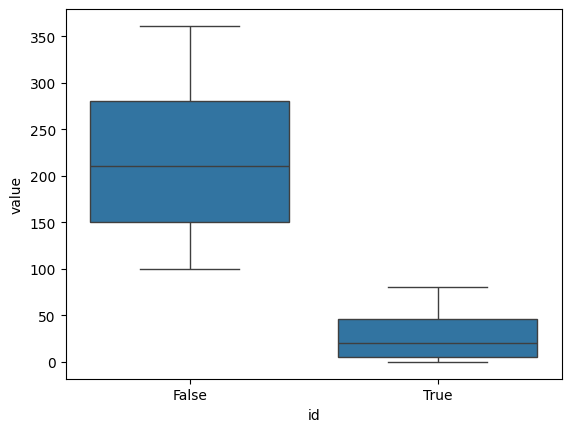

In [15]:
sns.boxplot(
    x = (df.id < 10), 
    y = df.value
)

Or, a linear regression

In [16]:
mod = smf.ols('value ~ id > 10 + type == "A"', data = df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     28.04
Date:                Thu, 11 Jan 2024   Prob (F-statistic):           4.14e-06
Time:                        00:01:07   Log-Likelihood:                -108.43
No. Observations:                  20   AIC:                             222.9
Df Residuals:                      17   BIC:                             225.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              53.0000     22.441      2.362      0.030       5.653     100.347
id > 10[T.True]       178.6667     29.922      5.971      0.000     115.538     241.796
type == "A"[T.True]   -49.5000     37.214     -1.330      0.201    -128.016      29.016
==============================================================================
Omnibus:                        1.298   Durbin-Watson:                   0.589
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                0.331
Skew:                           0.269   Prob(JB):                        0.847
Kurtosis:                       3.329   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's unpack this just a little bit. Inside each of these calls are at least three parts:
1. the LHS of the tilde, which is the outcome variable;
2. the RHS (which we're inputting as a logical test that is being evaluated at run time
3. the data that we're using.
4. oh, there are four: the tilde.

An equivalent way of each of these calls would be to use the vectors -- which might feel more similar to how you pull vectors and arrays in `scikit`. But, the ability to pull in whole data, and use the `~` as a splitting or modeling feature is a key component of the R language. 

# Head Home

Feel free to save the files that you've just edited, and then to close the *editor tab* that you've got open called `base_r.Rmd`. This way, you're organized for the next time you're here. 